<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/09-decision-trees/03_modeling_student_admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Modeling student admissions

In this notebook, we use decision trees to build a model that predicts admission to graduate schools.

##Setup

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.simplefilter("ignore", UserWarning)

random.seed(0)

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_9_Decision_Trees/utils.py
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_9_Decision_Trees/Admission_Predict.csv

Ref: https://www.kaggle.com/product-feedback/158412

In [13]:
import utils
import six
import sys
sys.modules['sklearn.externals.six'] = six

##Dataset

We begin by loading the dataset as a Pandas DataFrame called dataset.

In [4]:
dataset = pd.read_csv("Admission_Predict.csv", index_col=0)
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


The labels on the dataset are the chance of admission, which is a number between 0 and 1. 

To have binary labels, we’ll consider every student with a chance of 0.75 or higher as `admitted` and any other student as `not admitted`.

In [5]:
dataset["Admitted"] = dataset["Chance of Admit"] >= 0.75
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,True
2,324,107,4,4.0,4.5,8.87,1,0.76,True
3,316,104,3,3.0,3.5,8.00,1,0.72,False
4,322,110,3,3.5,2.5,8.67,1,0.80,True
5,314,103,2,2.0,3.0,8.21,0,0.65,False


In [6]:
# let's delete the unwanted column
dataset = dataset.drop(["Chance of Admit"], axis=1)
dataset.head() 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False


In [7]:
# let's seperate out the features and the labels
features = dataset.drop(["Admitted"], axis=1)
labels = dataset["Admitted"]

In [8]:
features.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


In [9]:
labels.head()

Serial No.
1     True
2     True
3    False
4     True
5    False
Name: Admitted, dtype: bool

##Decision tree

To build the decision tree, we create a DecisionTreeClassifier object and use the fit function.

###Building tree using Gini index

DecisionTreeClassifier by default use gini index.

In [10]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(features, labels)
decision_tree.score(features, labels)

1.0

In [11]:
# let's make prediction for the first five students
decision_tree.predict(features[:5])

array([ True,  True, False,  True, False])

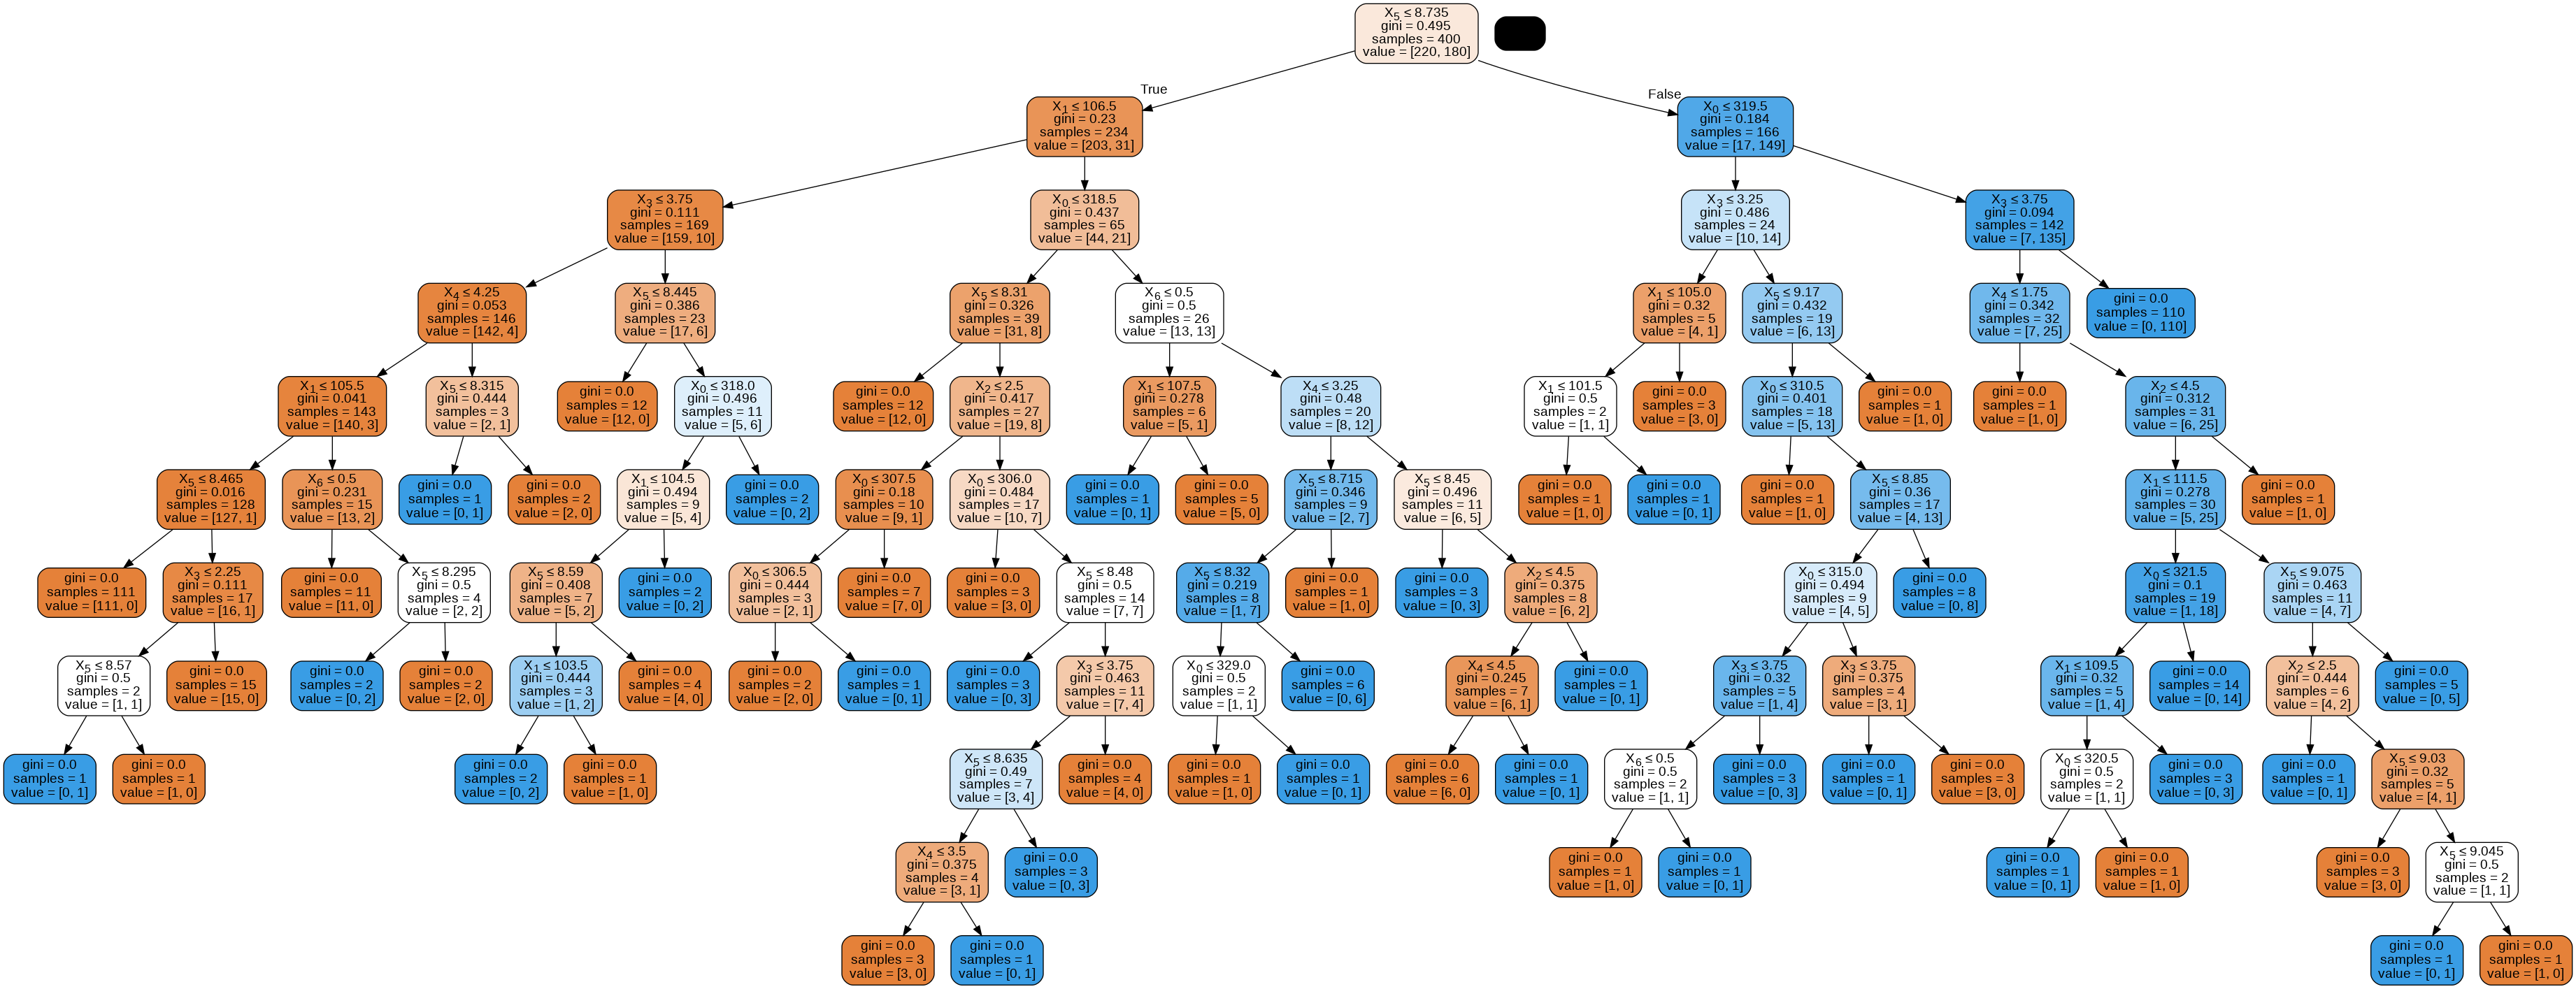

In [14]:
utils.display_tree(decision_tree)

However, the decision tree we just trained massively overfits. One way to see this is by using the
score function and realizing that it scores 100% in the training set.

Another way
to see the overfitting is to plot the tree and notice that its depth is 10.

###Building smaller tree

To prevent overfitting, we can use some of the hyperparameters.

So, let's play around with some of the parameters to find a good model.

In [19]:
decision_tree_smaller = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

decision_tree_smaller.fit(features, labels)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [20]:
decision_tree_smaller.score(features, labels)

0.885

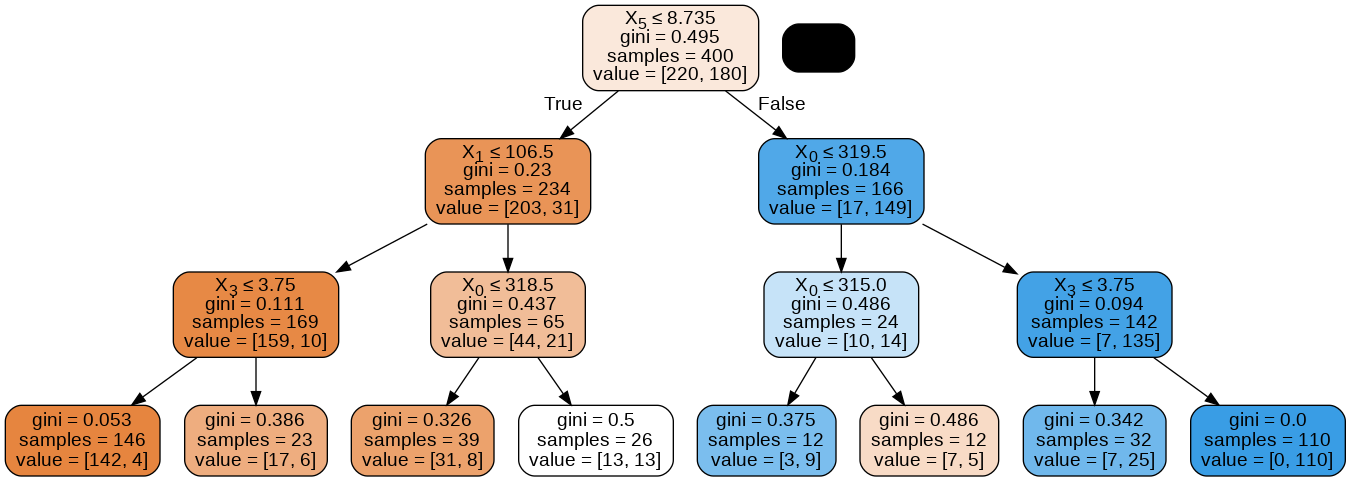

In [21]:
utils.display_tree(decision_tree_smaller)

Let’s predict the admission
for a student.

In [24]:
new_student = np.array([320, 110, 3, 4.0, 3.5, 8.9, 0])
decision_tree_smaller.predict([new_student])

array([ True])

A node in the white (neutral) leaf gets a false prediction.

In [25]:
new_student = np.array([320, 110, 3, 4.0, 3.5, 8.0, 0])
decision_tree_smaller.predict([new_student])

array([False])

Recall, however, that the construction of the tree is greedy in nature, namely, at each point it
selects the top feature. 

This doesn’t guarantee that the choice of features is the best, however.

###Building tree using entropy

To train it using entropy, we can specify it when building the DecisionTree object.

In [26]:
decision_tree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=10, min_samples_split=10)

decision_tree_entropy.fit(features, labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=10)

In [27]:
decision_tree_entropy.score(features, labels)

0.88

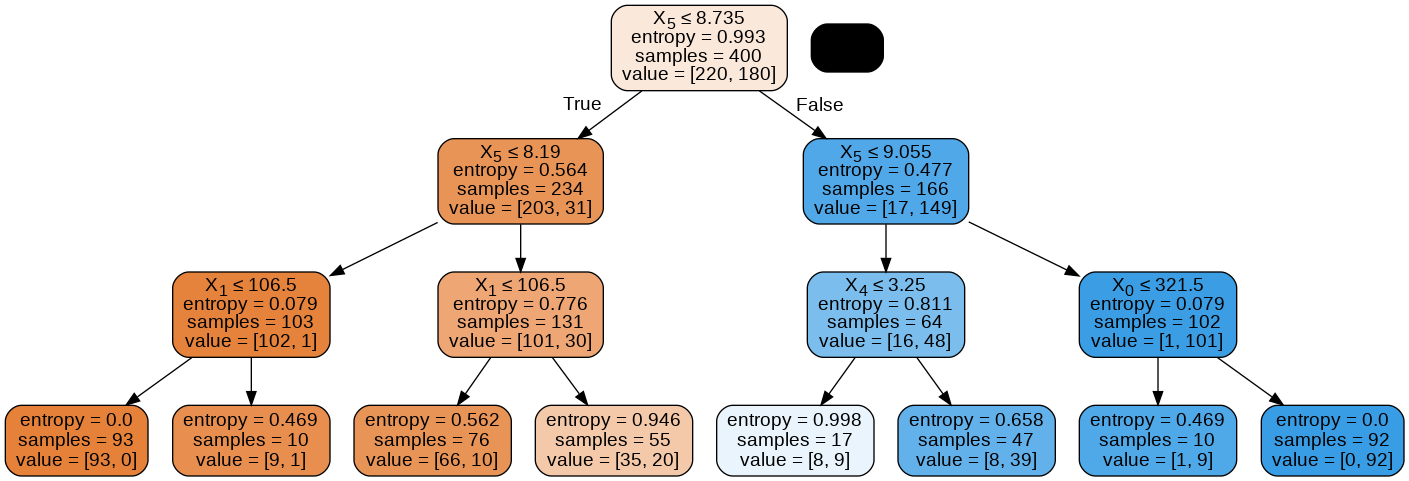

In [28]:
utils.display_tree(decision_tree_entropy)

In [30]:
new_student = np.array([320, 110, 3, 4.0, 3.5, 8.9, 0])
decision_tree_smaller.predict([new_student])

array([ True])

In [31]:
new_student = np.array([320, 110, 3, 4.0, 3.5, 8.0, 0])
decision_tree_smaller.predict([new_student])

array([False])

##Building decision tree depth-wise

We can specify more hyperparameters(`max_depth`) when training the tree.

In [ ]:
decision_tree_depth_1 = DecisionTreeClassifier(max_depth=1, criterion="entropy")

decision_tree_depth_1.fit(features, labels)
decision_tree_depth_1.score(features, labels)

0.8333333333333334

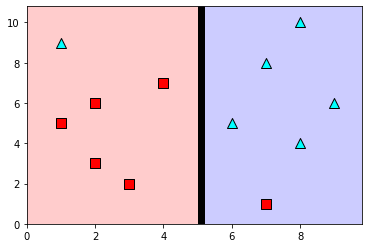

In [ ]:
utils.plot_model(features, labels, decision_tree_depth_1)

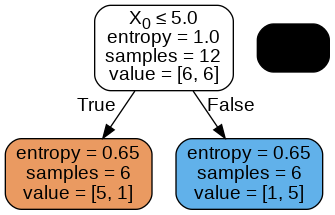

In [ ]:
utils.display_tree(decision_tree_depth_1)

Let's build it with depth 2.

In [ ]:
decision_tree_depth_2 = DecisionTreeClassifier(max_depth=2, criterion="entropy")

decision_tree_depth_2.fit(features, labels)
decision_tree_depth_2.score(features, labels)

1.0

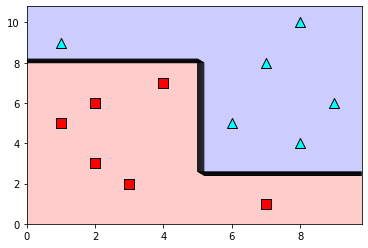

In [ ]:
utils.plot_model(features, labels, decision_tree_depth_2)

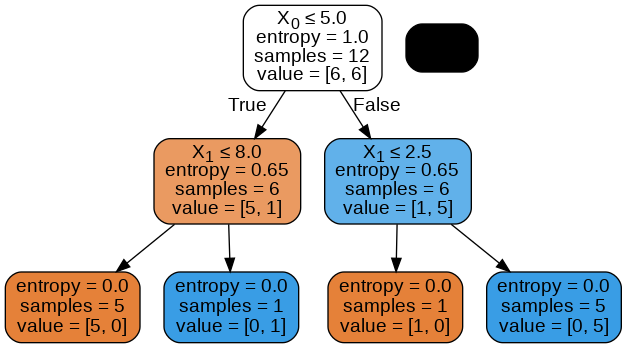

In [ ]:
utils.display_tree(decision_tree_depth_2)

Let's build it with depth 3.

In [ ]:
decision_tree_depth_3 = DecisionTreeClassifier(max_depth=3, criterion="entropy")

decision_tree_depth_3.fit(features, labels)
decision_tree_depth_3.score(features, labels)

1.0

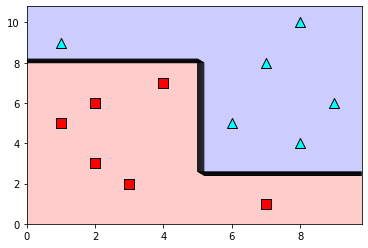

In [ ]:
utils.plot_model(features, labels, decision_tree_depth_3)

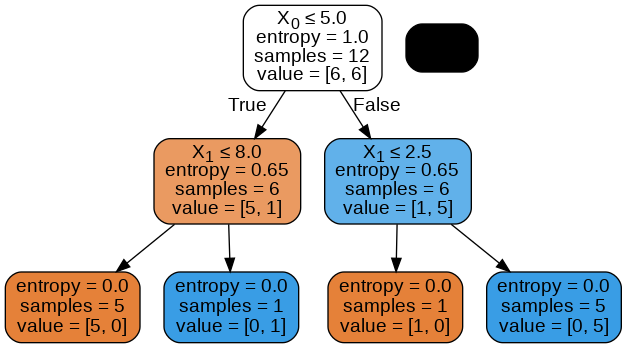

In [ ]:
utils.display_tree(decision_tree_depth_3)

Since `entropy`'s value is 0.0 for every leaf level, so depth 3 is not created.